<a href="https://colab.research.google.com/github/Stweel654/Steve_Tweel_STweel_64061-002/blob/main/Assignment_4_IMDB_Data_Tweel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
# Load the data - original
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Manually limit to 150 words
train_data_trunc = [review[:150] for review in train_data]
test_data_trunc = [review[:150] for review in test_data]

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

np.int64(1)

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7024 - loss: 0.5976 - val_accuracy: 0.8677 - val_loss: 0.3979
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8898 - loss: 0.3412 - val_accuracy: 0.8842 - val_loss: 0.3154
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9214 - loss: 0.2485 - val_accuracy: 0.8899 - val_loss: 0.2821
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9337 - loss: 0.2011 - val_accuracy: 0.8916 - val_loss: 0.2743


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

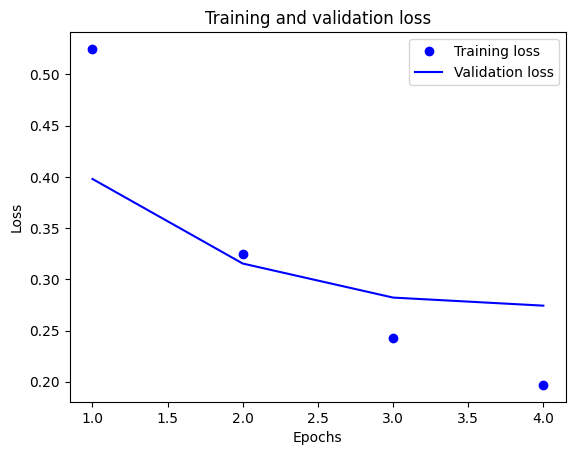

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

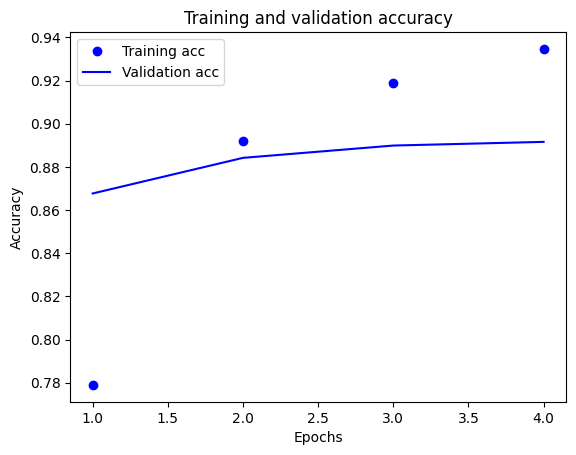

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training Results:

In [17]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8811 - loss: 0.2892


Test Results

In [18]:
results

#creating a results table

results_history = {}
results_history["base_model"] = {
    "loss": results[0],
    "accuracy": results[1],
    "history": history.history
}

# Question 1: Limit reviews to 150 words


In [19]:
train_data_trunc[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530]

In [20]:
max([max(sequence) for sequence in train_data_trunc])

9999

In [21]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data_trunc[0]])

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train_trunc = vectorize_sequences(train_data_trunc)
x_test_trunc = vectorize_sequences(test_data_trunc)

In [23]:
x_train_trunc[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
y_train_trunc = np.asarray(train_labels).astype("float32")
y_test_trunc = np.asarray(test_labels).astype("float32")

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val_trunc = x_train_trunc[:10000]
partial_x_train_trunc = x_train_trunc[10000:]
y_val_trunc = y_train_trunc[:10000]
partial_y_train_trunc = y_train_trunc[10000:]

history = model.fit(partial_x_train_trunc,
                    partial_y_train_trunc,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()



Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6401 - loss: 0.6245 - val_accuracy: 0.7940 - val_loss: 0.4644
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8567 - loss: 0.4083 - val_accuracy: 0.8783 - val_loss: 0.3172
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8981 - loss: 0.2980 - val_accuracy: 0.8817 - val_loss: 0.2935
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9148 - loss: 0.2455 - val_accuracy: 0.8720 - val_loss: 0.3110


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Training Results:

In [26]:
results = model.evaluate(x_test_trunc, y_test_trunc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8255 - loss: 0.3882


Test Results:

In [27]:
results

results_history["model_with_150_words"] = {
    "loss": results[0],
    "accuracy": results[1],
    "history": history.history
}

# Question 2, 3 & 4: Restrict training samples to 100, validate on 10,000 samples, consider only the top 10,000 words.

In [28]:


model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[100:]
y_val = y_train[:10000]
partial_y_train = y_train[100:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()



Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6930 - loss: 0.6028 - val_accuracy: 0.9002 - val_loss: 0.3941
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8969 - loss: 0.3593 - val_accuracy: 0.9250 - val_loss: 0.2666
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9222 - loss: 0.2570 - val_accuracy: 0.9408 - val_loss: 0.2051
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9366 - loss: 0.2021 - val_accuracy: 0.9474 - val_loss: 0.1745


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8872 - loss: 0.2852


In [30]:
results

results_history["model_Q_2_3_4"] = {
    "loss": results[0],
    "accuracy": results[1],
    "history": history.history
}

# Question 5, part 1: Use embeddening layer, and pretrained embeddening. This is training an embeddening layer.

In [31]:
model = keras.Sequential([
        layers.Embedding(input_dim=10000, output_dim=16),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[100:]
y_val = y_train[:10000]
partial_y_train = y_train[100:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=128,
                    validation_data=(x_val, y_val))


history_dict = history.history
history_dict.keys()


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 528ms/step - accuracy: 0.5406 - loss: 19.3328 - val_accuracy: 0.4947 - val_loss: 0.6932
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 548ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5053 - val_loss: 0.6931
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 548ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6932


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5073 - loss: 0.6931


In [34]:
results

results_history["model_trained_embedding"] = {
    "loss": results[0],
    "accuracy": results[1],
    "history": history.history
}

# Question 5 part 2: Pretrained word embeddening



In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

# Load GloVe embeddings
path_to_glove_file = "glove.6B.100d.txt"
embedding_dim = 100
max_tokens = 10000

# Prepare GloVe embeddings index
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

# Load IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=max_tokens)

# Create a reverse word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode a single review for visualization
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, "?") for i in text])

train_texts = [decode_review(review) for review in train_data]

# Split the data into training and validation sets
val_texts = train_texts[:10000]
val_labels = train_labels[:10000]
train_texts = train_texts[10000:]
train_labels = train_labels[10000:]

# Initialize and adapt the text vectorizer
text_vectorization = TextVectorization(max_tokens=max_tokens, output_sequence_length=250)
text_vectorization.adapt(train_texts)

# Prepare the embedding matrix
vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_tokens, embedding_dim))

for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the model
inputs = keras.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(input_dim=max_tokens,
                                   output_dim=embedding_dim,
                                   weights=[embedding_matrix],
                                   input_length=None,
                                   trainable=False)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedding_layer)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Display the model summary
model.summary()

# Prepare TensorFlow datasets
int_train_texts = text_vectorization(np.array([[s] for s in train_texts])).numpy()
int_val_texts = text_vectorization(np.array([[s] for s in val_texts])).numpy()

# Create TensorFlow datasets
int_train_ds = tf.data.Dataset.from_tensor_slices((int_train_texts, train_labels))
int_val_ds = tf.data.Dataset.from_tensor_slices((int_val_texts, val_labels))

# Shuffle and batch the datasets
int_train_ds = int_train_ds.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.AUTOTUNE)
int_val_ds = int_val_ds.batch(32).prefetch(tf.data.AUTOTUNE)

# Callbacks for saving the best model
callbacks = [
    keras.callbacks.ModelCheckpoint("glove_embeddings_sequence_model.keras", save_best_only=True)
]

# Train the model
history = model.fit(int_train_ds,
                    validation_data=int_val_ds,
                    epochs=3,
                    callbacks=callbacks)

# Reload the best model
model = keras.models.load_model("glove_embeddings_sequence_model.keras")

# Access the training history
history_dict = history.history
print(history_dict.keys())


Found 400000 word vectors.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, None, 100)      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,034,113 (3.94 MB)

 Trainable params: 34,113 (133.25 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 217ms/step - accuracy: 0.5959 - loss: 0.6639 - val_accuracy: 0.7085 - val_loss: 0.5850
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - accuracy: 0.7476 - loss: 0.5386 - val_accuracy: 0.7890 - val_loss: 0.4671
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 218ms/step - accuracy: 0.7871 - loss: 0.4705 - val_accuracy: 0.7883 - val_loss: 0.4666
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [38]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1551s 2s/step - accuracy: 0.4927 - loss: 0.6944


In [39]:
results

results_history["model_pretrained"] = {
    "loss": results[0],
    "accuracy": results[1],
    "history": history.history
}

## Plotting the results in graphs as well as a table

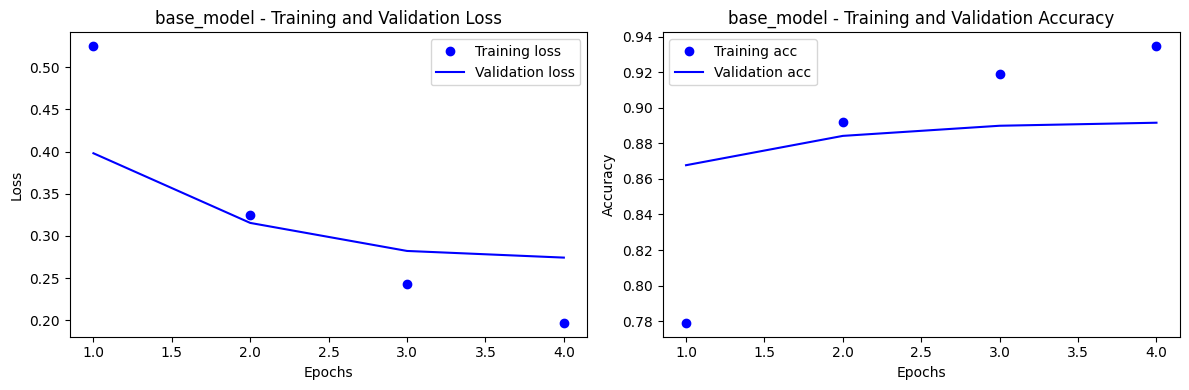

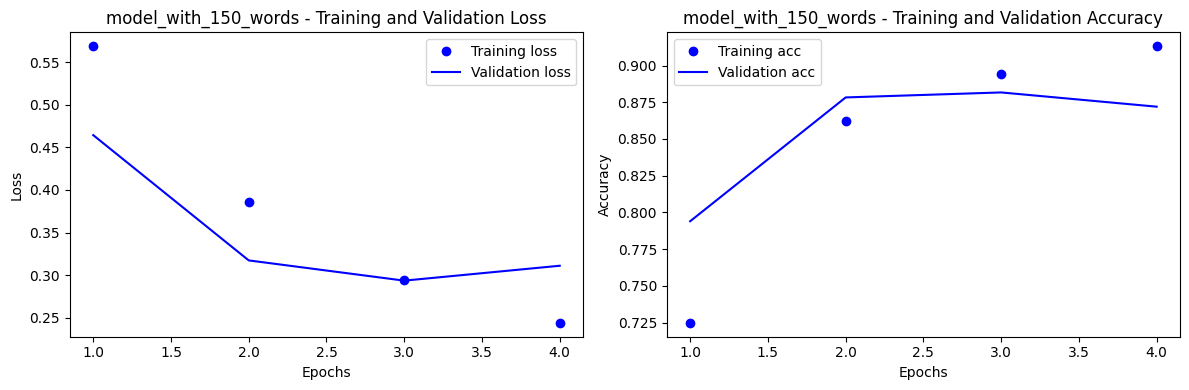

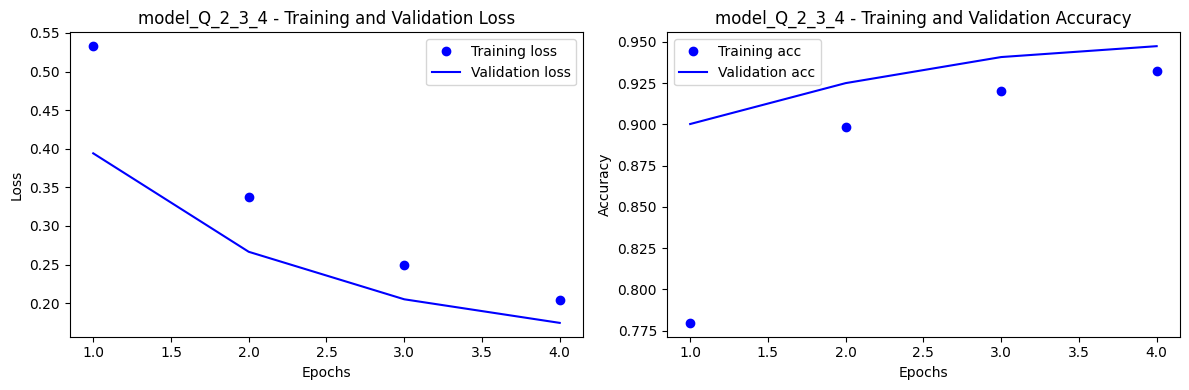

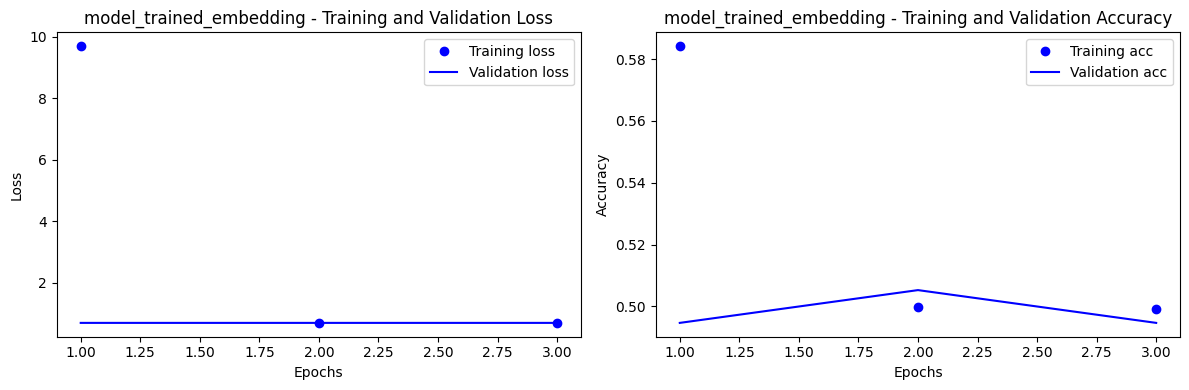

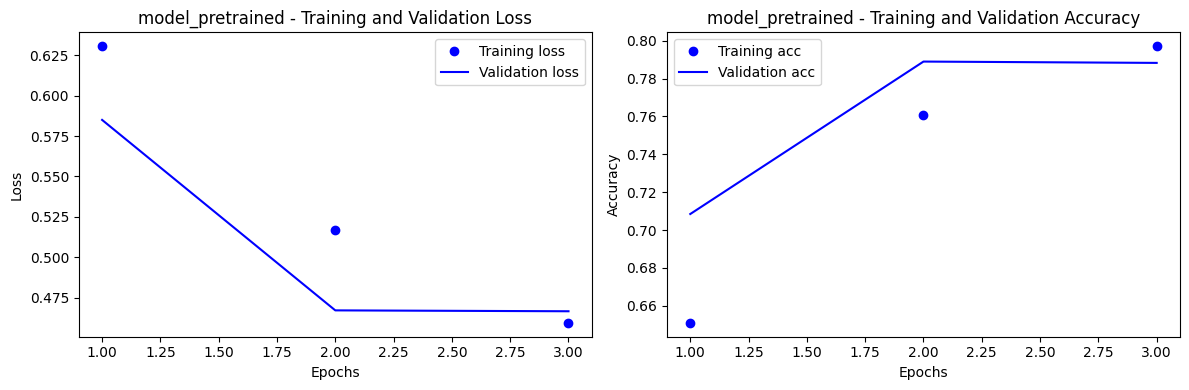

In [40]:
# Plot accuracy and loss for all the different models
def plot_model_results(model_name, history):
    history_dict = history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title(f"{model_name} - Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title(f"{model_name} - Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot results for each model
for model_name, results in results_history.items():
    plot_model_results(model_name, results['history'])



In conclusion, the model I would pick overall would be the model with MSE instead of binary_crossentropy as the loss function. This model improved accuracy over all other models, and had a much lower loss function in both the training and validation sets.

# Outputting a table of all results together

In [41]:
import pandas as pd

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_history, orient="index")

# Print the DataFrame as a table
print(results_df)

from tabulate import tabulate

# Print the results using tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

# Extract accuracy and loss for each model from the results_history
accuracy = []
loss = []
models = list(results_history.keys())

for model_name, results in results_history.items():
    history_dict = results['history']
    accuracy.append(history_dict['accuracy'][-1])  # Use the last accuracy value
    loss.append(history_dict['loss'][-1])  # Use the last loss value



                             loss  accuracy  \
base_model               0.288610   0.88332   
model_with_150_words     0.386296   0.82648   
model_Q_2_3_4            0.283725   0.88852   
model_trained_embedding  0.693147   0.50000   
model_pretrained         0.693861   0.50000   

                                                                   history  
base_model               {'accuracy': [0.7789999842643738, 0.8918666839...  
model_with_150_words     {'accuracy': [0.7247999906539917, 0.8624666929...  
model_Q_2_3_4            {'accuracy': [0.7796385288238525, 0.8981927633...  
model_trained_embedding  {'accuracy': [0.5841767191886902, 0.4998393654...  
model_pretrained         {'accuracy': [0.6510000228881836, 0.7609333395...  
+-------------------------+---------------------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In conclusion, the model I would pick overall would be the model with MSE instead of binary_crossentropy as the loss function. This model improved accuracy over all other models, and had a much lower loss function in both the training and validation sets.

## Plotting all results in charts to visually compare

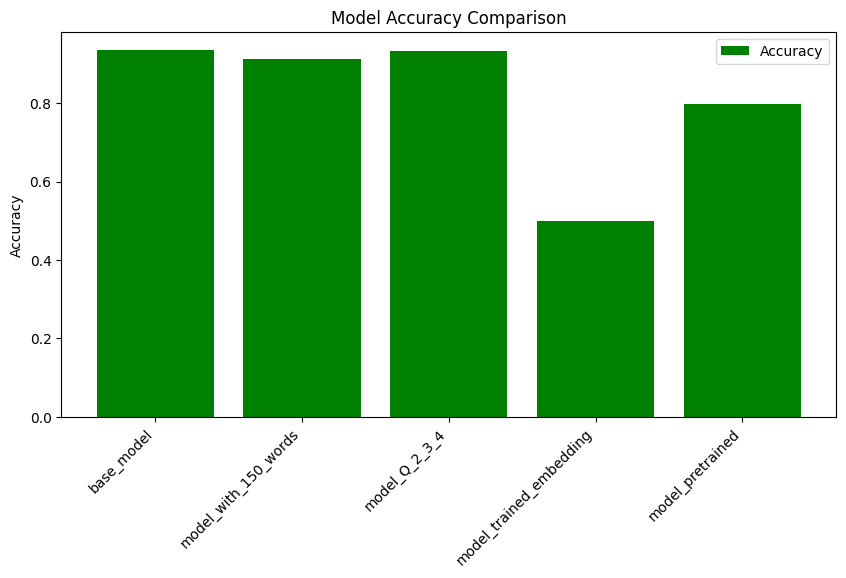

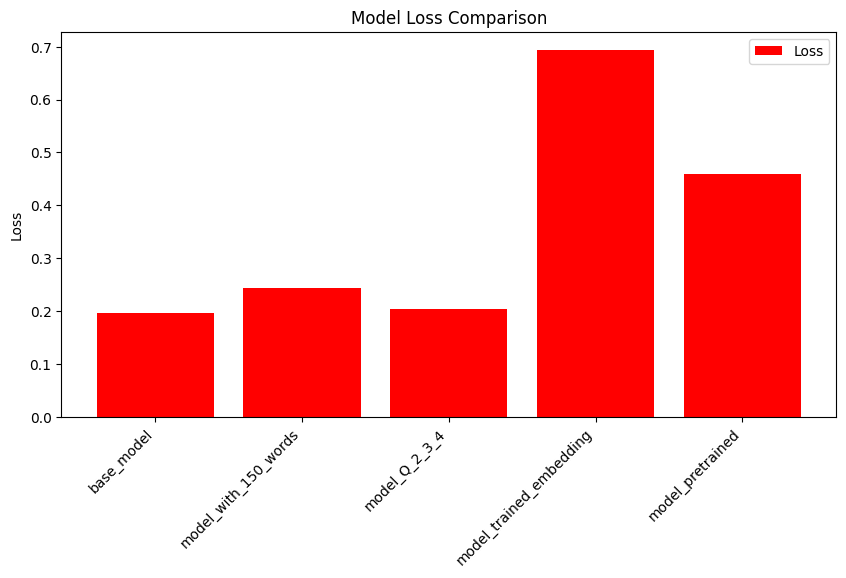

In [42]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color="green", label="Accuracy")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.xticks(rotation=45, ha="right")  # Rotate model names for better readability
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 5))
plt.bar(models, loss, color="red", label="Loss")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.legend()
plt.xticks(rotation=45, ha="right")  # Rotate model names for better readability
plt.show()

In [43]:
#making a blank code window to see if it shows all my output when I print to PDF

In [44]:
#making a blank code window to see if it shows all my output when I print to PDF

In [45]:
#making a blank code window to see if it shows all my output when I print to PDF

In [46]:
#making a blank code window to see if it shows all my output when I print to PDF

In [47]:
#making a blank code window to see if it shows all my output when I print to PDF

In [48]:
#making a blank code window to see if it shows all my output when I print to PDF

In [49]:
#making a blank code window to see if it shows all my output when I print to PDF

In [50]:
#making a blank code window to see if it shows all my output when I print to PDF

In [51]:
#making a blank code window to see if it shows all my output when I print to PDF

In [52]:
#making a blank code window to see if it shows all my output when I print to PDF

In [53]:
#making a blank code window to see if it shows all my output when I print to PDF

In [54]:
#making a blank code window to see if it shows all my output when I print to PDF

In [55]:
#making a blank code window to see if it shows all my output when I print to PDF

In [56]:
#making a blank code window to see if it shows all my output when I print to PDF

In [57]:
#making a blank code window to see if it shows all my output when I print to PDF